<h1>Análise de persona com base nos clientes Tray</h1>

In [1]:
#importa as bibliotecas
import pandas as pd
import numpy as np
from datetime import date
pd.set_option('display.max_columns', None)

In [2]:
#coloca a fonte de clientes em dataframe
df_clientes = pd.read_csv('todos_os_clientes_tray_07.22.csv')

C:\Temp\ipykernel_16816\2323226292.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clientes = pd.read_csv('todos_os_clientes_tray_07.22.csv')


In [3]:
#concatena as fontes de dados de pedidos em um único dataframe
df = pd.read_excel('rel_pedidos_pag_1.xls',skiprows=8, nrows=500)
df2 = pd.read_excel('rel_pedidos_pag_2.xls',skiprows=8, nrows=500)
df3 = pd.read_excel('rel_pedidos_pag_3.xls',skiprows=8, nrows=232)
df_pedidos = pd.concat([df, df2, df3])
df_pedidos.shape

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


(1232, 54)

In [4]:
# adiciona a data de nascimento ao conjunto de dados dos pedidos
# adiciona o sexo ao conjunto de dados dos pedidos
data = []
sexo = []
for index1, row1 in enumerate(df_pedidos[['ID_CLIENTE']].values):
    for index2, row2 in enumerate(df_clientes[['id_cliente']].values):
        if row1 == row2: 
            data.append(df_clientes['data_nascimento'][index2])
data = pd.Series(data)
df_pedidos['nascimento'] = data


In [5]:
# tranforma as datas para timestamp
df_pedidos['nascimento'] = pd.to_datetime(df_pedidos['nascimento'], format='%d/%m/%Y', errors='ignore')
df_pedidos['nascimento'].head()
df_pedidos.reset_index(inplace=True)


In [6]:
#encontra a idade
today = date.today()
df_pedidos['idade'] = pd.to_datetime(today).year - df_pedidos['nascimento'].dt.year
df_pedidos.shape




(1232, 57)

In [7]:
#separa os dataframes em pedidos finalizados ou cancelados e finalizados na loja online(tray)
df_finalizados = df_pedidos[df_pedidos['STATUS'].str.contains("FINALIZADO", regex=True)==True]
df_cancelado = df_pedidos[df_pedidos['STATUS'].str.contains("CANCELADO|CANCELADO AUT", regex=True)==True]
df_finalizados_tray = df_finalizados[df_finalizados['LOCAL_VENDA'].str.contains("LOJA VIRTUAL", regex=True)==True]



In [8]:
# cria uma nova coluna que indica se o cliente é empresa ou não
cnpj01 = []
for i in df_finalizados_tray['CNPJ'].values:
    if str(i) == 'nan':
        cnpj01.append(0)
    else:
        cnpj01.append(1)
df_finalizados_tray['cnpj01'] = cnpj01
df_finalizados_tray.head(2)

C:\Temp\ipykernel_16816\276035008.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalizados_tray['cnpj01'] = cnpj01


,index,Unnamed: 0,PEDIDO,DATA_PEDIDOS,HORA,SUBTOTAL_DE_PRODUTOS,IMPOSTOS,LOCAL_VENDA,FRETE,VALOR_FRETE,PAGAMENTO1,FORMA_PAGAMENTO_ESCOLHIDA,DATA_ENVIOS,COD_ENVIO,OBS_CLIENTE,OBS_LOJA,STATUS,PARCEIRO,VALOR_COMISSAO,CUPOM_DESCONTO,DESCONTO,ACRESCIMO_FORMA,ID_CLIENTE,CLIENTE,APELIDO,RG,CPF,EMAIL,TELEFONE,TELEFONE2,RAZAO,CNPJ,IE,DESTINATARIO,ENDERECO,NUM,CIDADE,ESTADO,CEP,COMPLEMENTO,BAIRRO,PAIS,DATA_PAGAMENTO,VALOR_PAGTO,FORMA_PAGAMENTO_PAGA,ENDERECO_COBRANCA,NUM_COBRANCA,CIDADE_COBRANCA,ESTADO_COBRANCA,CEP_COBRANCA,COMPLEMENTO_COBRANCA,BAIRRO_COBRANCA,PAIS_COBRANCA,TOTAL,VENDEDOR_DO_MERCADOLIVRE,nascimento,idade,cnpj01
0,0,NaN,97529.0,01/04/2022,00:15:51,839.0,0.0,LOJA VIRTUAL,Braspress,0.0,NaN,Boleto Bancario,04/04/2022,131920,NaN,01/04/2022 00:15:55 Pedido em 1 vez de R$ 713....,FINALIZADO,0.0,"0,00",NaN,0.0,-125.85,93063.0,Maria Tereza de Sa,NaN,NaN,81532717687,mariaterezadesa71@gmail.com,NaN,3.898821e+10,NaN,NaN,NaN,Maria Tereza de Sa,Rua Jatiba,5,Tres Marias,MG,39205-000,NaN,Joaquim de Lima,Brasil,01/04/2022,"713,15",Boleto Bancario,Rua Jatiba,5,Tres Marias,MG,39205-000,NaN,Joaquim de Lima,Brasil,713.15,NaN,1971-06-09,51.0,0
5,5,NaN,97539.0,01/04/2022,08:53:39,1890.0,0.0,LOJA VIRTUAL,Total Express,0.0,NaN,Pix - Yapay,01/04/2022,131853,NaN,"01/04/2022 08:53:43 Pedido em 1 vez de R$ 1,60...",FINALIZADO,2180.0,"0,00",NaN,0.0,-283.50,89989.0,EDISON RONCOLETTA JUNIOR,NaN,NaN,14995820809,edison@grsolucoes.com.br,NaN,1.198301e+10,NaN,NaN,NaN,EDISON RONCOLETTA JUNIOR,Rodovia Romildo Prado,5004,Louveira,SP,13290-000,Cnd.Sta. Isabel,Engenho Seco,Brasil,01/04/2022,"1.603,45",Pix - Yapay,Rodovia Romildo Prado,5004,Louveira,SP,13290-000,Cnd.Sta. Isabel,Engenho Seco,Brasil,1606.50,NaN,1973-11-24,49.0,0


In [9]:
# cria uma nova coluna que indica o sexo
#nomes_f = ["ADRIANA|AGDA|ANA|Amanda|Ana|Andreia|Angelica|Barbara|Bruna|CamilaSouza|Carla|Celia|Christiane|Cleci|Deise|Elisangela|Eliza|Estela|FRANCIELLI|Flaviane|GIULIA|JESSICA|Jacqueline|Jenifer|Jessica|Jucelaine|KAREN|LARISSA|Leticia|Lidia|Lisiane|Livia|Luna|MARIA|MARIANTE|Marcia|Maria|Marilla|Melanie|Merlo|Patricia|Renata|SIBELE|SUELEM|Simone|THAIS|Talyni|Tatiane|Tatyana|Thayne|VALDINEZ|VERILDA|VIVIANA|francielle|gabrielle|luciene"]
sex = []
for i in df_finalizados_tray['CLIENTE'].str.match("ADRIANA|AGDA|ANA|Amanda|Ana|Andreia|Angelica|Barbara|Bruna|CamilaSouza|Carla|Celia|Christiane|Cleci|Deise|Elisangela|Eliza|Estela|FRANCIELLI|Flaviane|GIULIA|JESSICA|Jacqueline|Jenifer|Jessica|Jucelaine|KAREN|LARISSA|Leticia|Lidia|Lisiane|Livia|Luna|MARIA|MARIANTE|Marcia|Maria|Marilla|Melanie|Merlo|Patricia|Renata|SIBELE|SUELEM|Simone|THAIS|Talyni|Tatiane|Tatyana|Thayne|VALDINEZ|VERILDA|VIVIANA|francielle|gabrielle|luciene"):
    if i == True:
        sex.append(0)
    else:
        sex.append(1)
sex = pd.Series(sex)
df_finalizados_tray['sex'] = sex
df_finalizados_tray.head(2)        


C:\Temp\ipykernel_16816\456387791.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalizados_tray['sex'] = sex


,index,Unnamed: 0,PEDIDO,DATA_PEDIDOS,HORA,SUBTOTAL_DE_PRODUTOS,IMPOSTOS,LOCAL_VENDA,FRETE,VALOR_FRETE,PAGAMENTO1,FORMA_PAGAMENTO_ESCOLHIDA,DATA_ENVIOS,COD_ENVIO,OBS_CLIENTE,OBS_LOJA,STATUS,PARCEIRO,VALOR_COMISSAO,CUPOM_DESCONTO,DESCONTO,ACRESCIMO_FORMA,ID_CLIENTE,CLIENTE,APELIDO,RG,CPF,EMAIL,TELEFONE,TELEFONE2,RAZAO,CNPJ,IE,DESTINATARIO,ENDERECO,NUM,CIDADE,ESTADO,CEP,COMPLEMENTO,BAIRRO,PAIS,DATA_PAGAMENTO,VALOR_PAGTO,FORMA_PAGAMENTO_PAGA,ENDERECO_COBRANCA,NUM_COBRANCA,CIDADE_COBRANCA,ESTADO_COBRANCA,CEP_COBRANCA,COMPLEMENTO_COBRANCA,BAIRRO_COBRANCA,PAIS_COBRANCA,TOTAL,VENDEDOR_DO_MERCADOLIVRE,nascimento,idade,cnpj01,sex
0,0,NaN,97529.0,01/04/2022,00:15:51,839.0,0.0,LOJA VIRTUAL,Braspress,0.0,NaN,Boleto Bancario,04/04/2022,131920,NaN,01/04/2022 00:15:55 Pedido em 1 vez de R$ 713....,FINALIZADO,0.0,"0,00",NaN,0.0,-125.85,93063.0,Maria Tereza de Sa,NaN,NaN,81532717687,mariaterezadesa71@gmail.com,NaN,3.898821e+10,NaN,NaN,NaN,Maria Tereza de Sa,Rua Jatiba,5,Tres Marias,MG,39205-000,NaN,Joaquim de Lima,Brasil,01/04/2022,"713,15",Boleto Bancario,Rua Jatiba,5,Tres Marias,MG,39205-000,NaN,Joaquim de Lima,Brasil,713.15,NaN,1971-06-09,51.0,0,0.0
5,5,NaN,97539.0,01/04/2022,08:53:39,1890.0,0.0,LOJA VIRTUAL,Total Express,0.0,NaN,Pix - Yapay,01/04/2022,131853,NaN,"01/04/2022 08:53:43 Pedido em 1 vez de R$ 1,60...",FINALIZADO,2180.0,"0,00",NaN,0.0,-283.50,89989.0,EDISON RONCOLETTA JUNIOR,NaN,NaN,14995820809,edison@grsolucoes.com.br,NaN,1.198301e+10,NaN,NaN,NaN,EDISON RONCOLETTA JUNIOR,Rodovia Romildo Prado,5004,Louveira,SP,13290-000,Cnd.Sta. Isabel,Engenho Seco,Brasil,01/04/2022,"1.603,45",Pix - Yapay,Rodovia Romildo Prado,5004,Louveira,SP,13290-000,Cnd.Sta. Isabel,Engenho Seco,Brasil,1606.50,NaN,1973-11-24,49.0,0,1.0


In [56]:
#pagamentos à vista = 1 a prazo = 0

import re
n = []
for row, c  in enumerate(df_finalizados_tray['FORMA_PAGAMENTO_PAGA'].values):
    if re.match("Pix - Yapay|Boleto Bancario", str(df_finalizados_tray['FORMA_PAGAMENTO_PAGA'].values[row])):
        n.append(1)        

    if re.match("Cartao|Transferencia", str(df_finalizados_tray['FORMA_PAGAMENTO_PAGA'].values[row])):
        n.append(0)
        
df_finalizados_tray['pag'] = pd.Series(n)
df_finalizados_tray.head(2)

C:\Temp\ipykernel_16816\1479340407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalizados_tray['pag'] = pd.Series(n)


,index,Unnamed: 0,PEDIDO,DATA_PEDIDOS,HORA,SUBTOTAL_DE_PRODUTOS,IMPOSTOS,LOCAL_VENDA,FRETE,VALOR_FRETE,PAGAMENTO1,FORMA_PAGAMENTO_ESCOLHIDA,DATA_ENVIOS,COD_ENVIO,OBS_CLIENTE,OBS_LOJA,STATUS,PARCEIRO,VALOR_COMISSAO,CUPOM_DESCONTO,DESCONTO,ACRESCIMO_FORMA,ID_CLIENTE,CLIENTE,APELIDO,RG,CPF,EMAIL,TELEFONE,TELEFONE2,RAZAO,CNPJ,IE,DESTINATARIO,ENDERECO,NUM,CIDADE,ESTADO,CEP,COMPLEMENTO,BAIRRO,PAIS,DATA_PAGAMENTO,VALOR_PAGTO,FORMA_PAGAMENTO_PAGA,ENDERECO_COBRANCA,NUM_COBRANCA,CIDADE_COBRANCA,ESTADO_COBRANCA,CEP_COBRANCA,COMPLEMENTO_COBRANCA,BAIRRO_COBRANCA,PAIS_COBRANCA,TOTAL,VENDEDOR_DO_MERCADOLIVRE,nascimento,idade,cnpj01,sex,pag
0,0,NaN,97529.0,01/04/2022,00:15:51,839.0,0.0,LOJA VIRTUAL,Braspress,0.0,NaN,Boleto Bancario,04/04/2022,131920,NaN,01/04/2022 00:15:55 Pedido em 1 vez de R$ 713....,FINALIZADO,0.0,"0,00",NaN,0.0,-125.85,93063.0,Maria Tereza de Sa,NaN,NaN,81532717687,mariaterezadesa71@gmail.com,NaN,3.898821e+10,NaN,NaN,NaN,Maria Tereza de Sa,Rua Jatiba,5,Tres Marias,MG,39205-000,NaN,Joaquim de Lima,Brasil,01/04/2022,"713,15",Boleto Bancario,Rua Jatiba,5,Tres Marias,MG,39205-000,NaN,Joaquim de Lima,Brasil,713.15,NaN,1971-06-09,51.0,0,0.0,1.0
5,5,NaN,97539.0,01/04/2022,08:53:39,1890.0,0.0,LOJA VIRTUAL,Total Express,0.0,NaN,Pix - Yapay,01/04/2022,131853,NaN,"01/04/2022 08:53:43 Pedido em 1 vez de R$ 1,60...",FINALIZADO,2180.0,"0,00",NaN,0.0,-283.50,89989.0,EDISON RONCOLETTA JUNIOR,NaN,NaN,14995820809,edison@grsolucoes.com.br,NaN,1.198301e+10,NaN,NaN,NaN,EDISON RONCOLETTA JUNIOR,Rodovia Romildo Prado,5004,Louveira,SP,13290-000,Cnd.Sta. Isabel,Engenho Seco,Brasil,01/04/2022,"1.603,45",Pix - Yapay,Rodovia Romildo Prado,5004,Louveira,SP,13290-000,Cnd.Sta. Isabel,Engenho Seco,Brasil,1606.50,NaN,1973-11-24,49.0,0,1.0,1.0


In [57]:
dftray = df_finalizados_tray[['SUBTOTAL_DE_PRODUTOS', 'pag','idade', 'cnpj01', 'sex']].reset_index(drop=True)
pd.set_option('display.max_rows', 350)
dftray.head()

,SUBTOTAL_DE_PRODUTOS,pag,idade,cnpj01,sex
0,839.0,1.0,51.0,0,0.0
1,1890.0,1.0,49.0,0,1.0
2,839.0,0.0,26.0,0,1.0
3,624.0,1.0,40.0,1,1.0
4,479.0,1.0,39.0,0,1.0


In [62]:
dftray['pag'].value_counts()

1.0    61
0.0    24
Name: pag, dtype: int64

In [ ]:
dfemail_limpo = dftray[dftray['email_cliente'].str.contains("mercadolivre|email|tray|magalu|extra|integracommerce|amazon", regex=True)==False]

In [ ]:
df_dummy = pd.get_dummies(dftray)
df_dummy.head(2)

,SUBTOTAL_DE_PRODUTOS,idade,cnpj01,sex,FORMA_PAGAMENTO_PAGA_Boleto Bancario,FORMA_PAGAMENTO_PAGA_Cartao Elo - Yapay,FORMA_PAGAMENTO_PAGA_Cartao MasterCard - Yapay,FORMA_PAGAMENTO_PAGA_Cartao Visa - Yapay,FORMA_PAGAMENTO_PAGA_Pix - Yapay,FORMA_PAGAMENTO_PAGA_Transferencia Online - Banco do Brasil,FORMA_PAGAMENTO_PAGA_Transferencia Online - Sicoob
0,839.0,51.0,0,0.0,1,0,0,0,0,0,0
1,1890.0,49.0,0,1.0,0,0,0,0,1,0,0


<h1>K-Means Clustering</h1>

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
dftray.corr()

,SUBTOTAL_DE_PRODUTOS,pag,idade,cnpj01,sex
SUBTOTAL_DE_PRODUTOS,1.000000,0.044463,0.097255,0.212501,0.213820
pag,0.044463,1.000000,0.039673,0.056319,-0.022879
idade,0.097255,0.039673,1.000000,0.118013,-0.091618
cnpj01,0.212501,0.056319,0.118013,1.000000,0.176395
sex,0.213820,-0.022879,-0.091618,0.176395,1.000000


In [67]:
dftray = dftray.dropna()

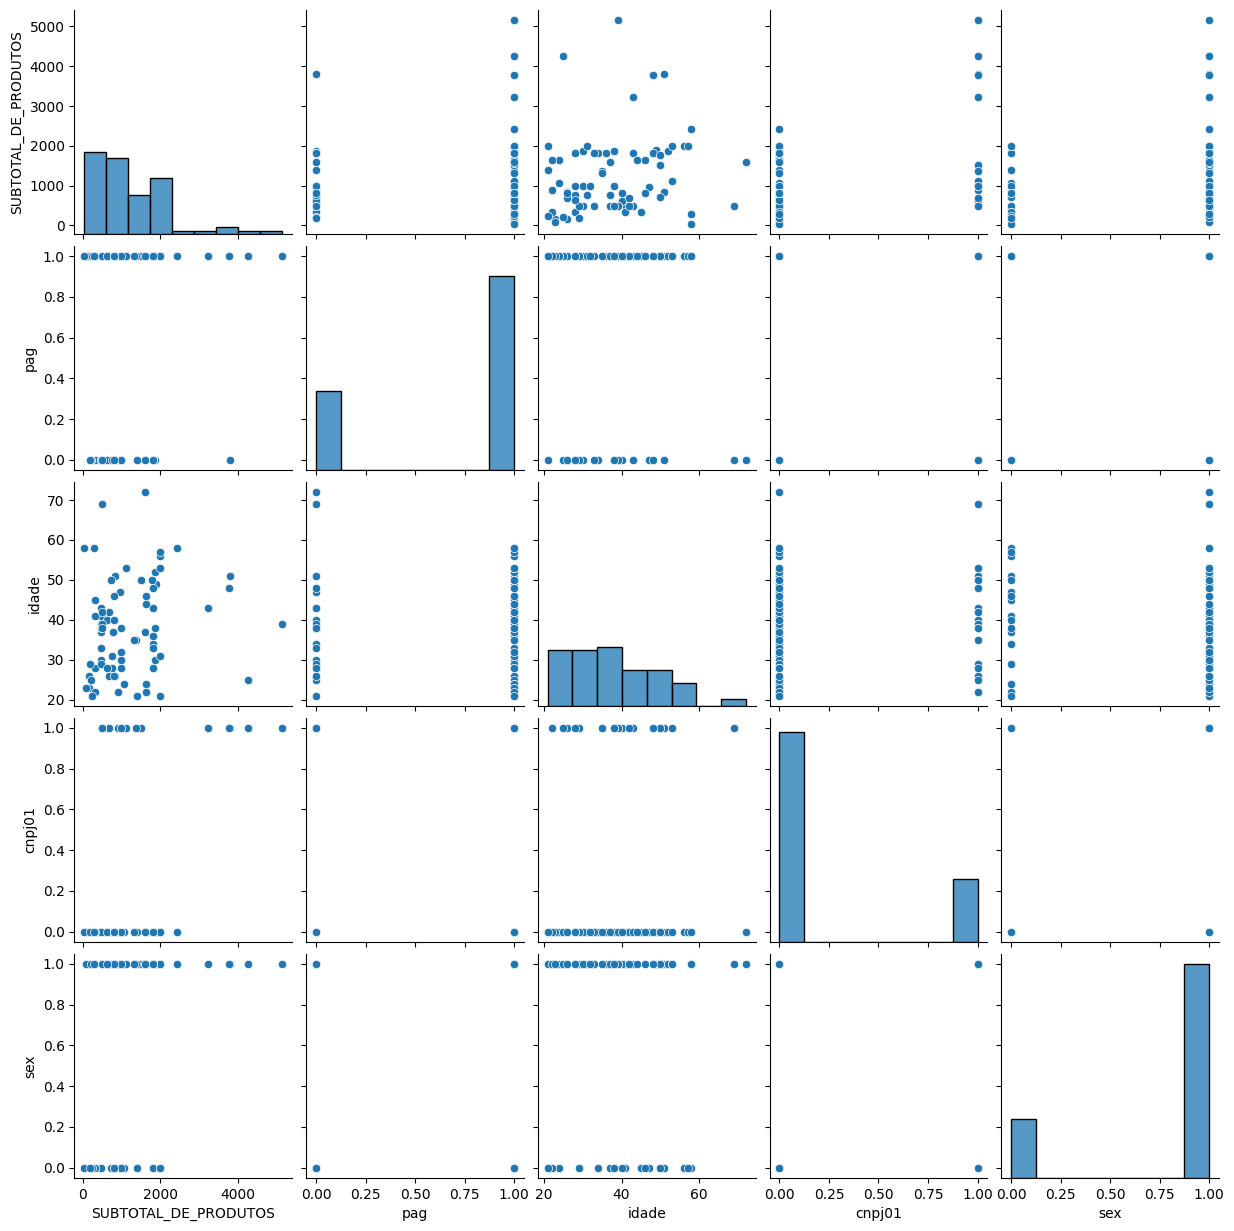

In [68]:
sns.pairplot(dftray)

In [69]:
ss = StandardScaler()
data = ss.fit_transform(dftray)

In [70]:
km = KMeans(n_clusters= 5, random_state= 42)
km.fit(data)

KMeans(n_clusters=5, random_state=42)

C:\Temp\ipykernel_16816\2470451002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftray['cluster_km'] = km.labels_


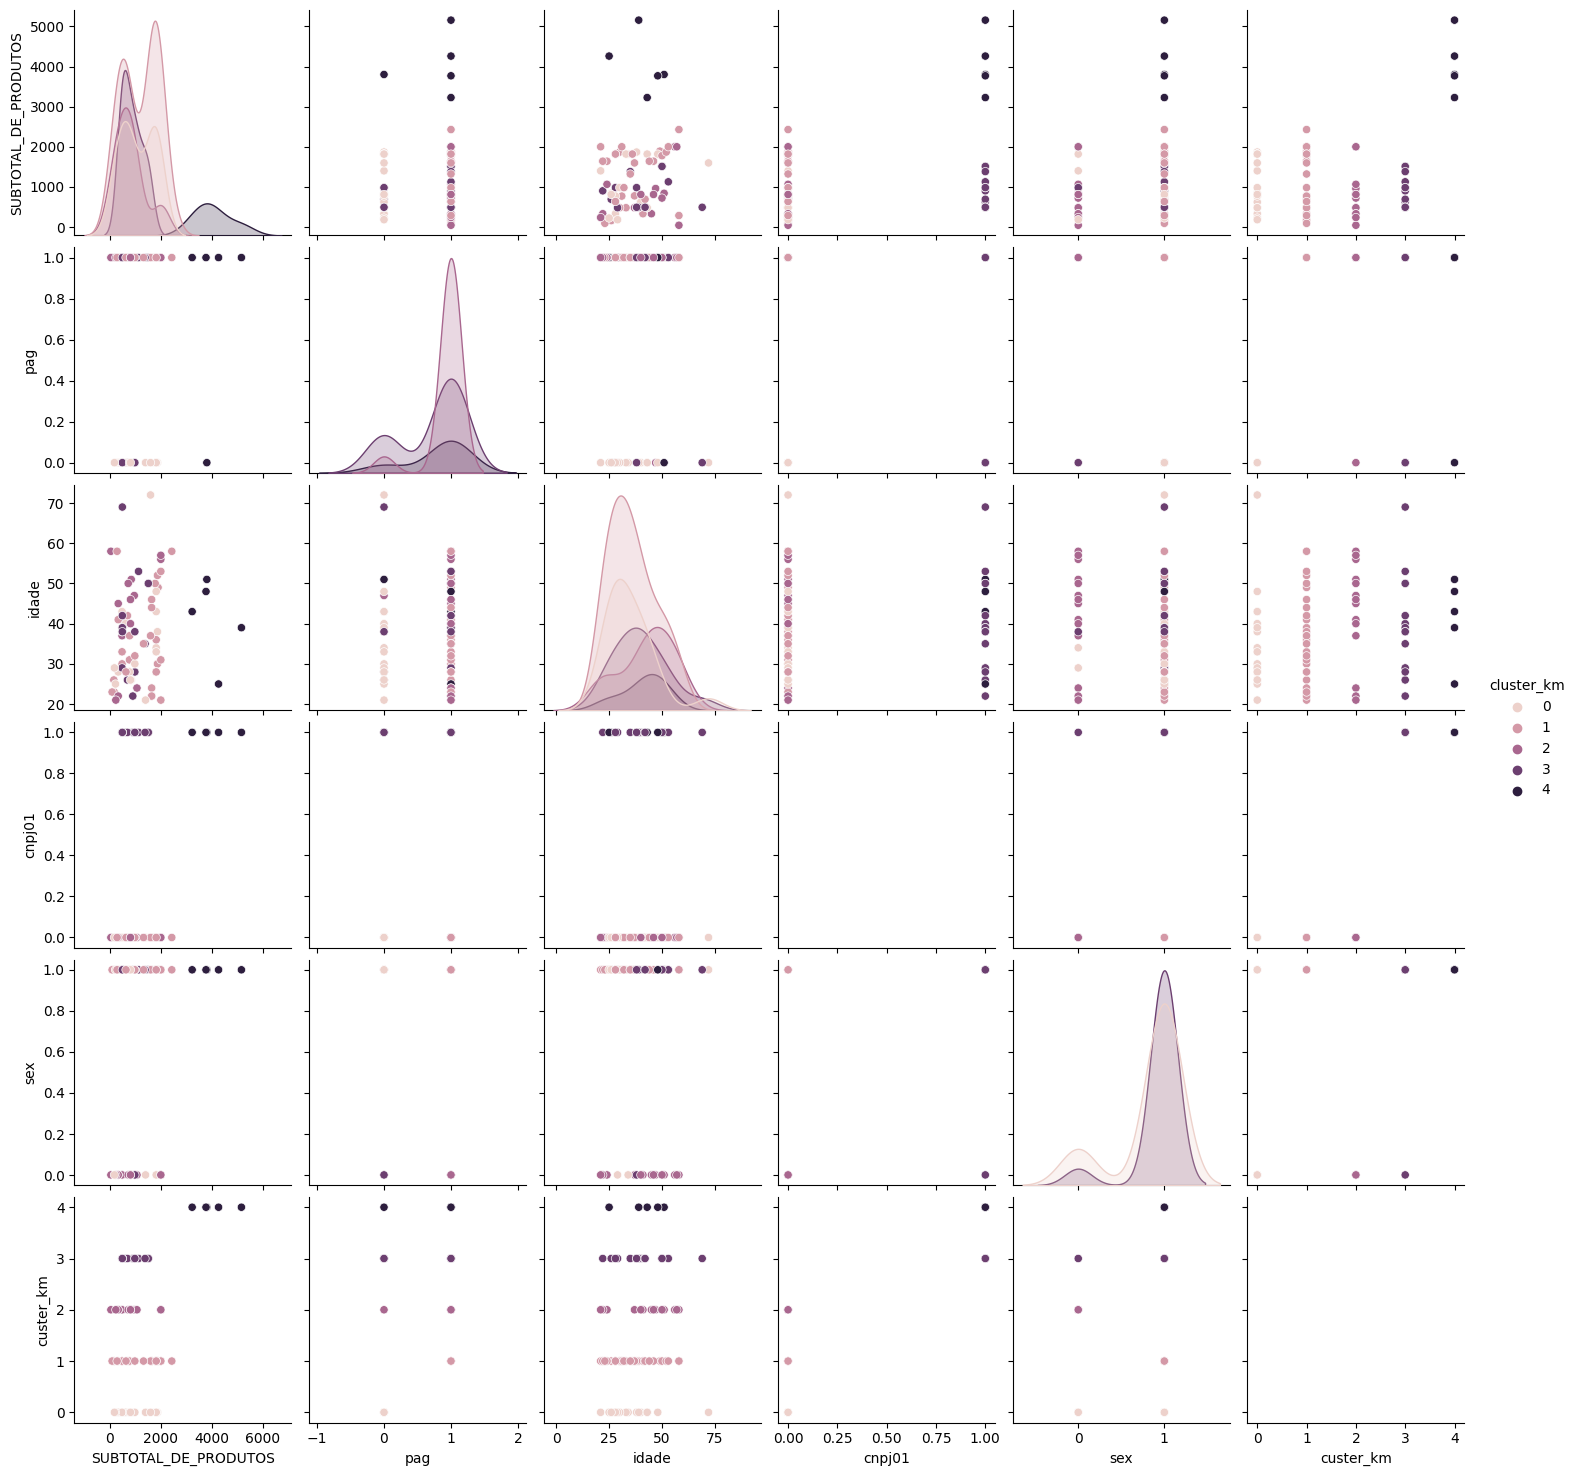

In [72]:
dftray['cluster_km'] = km.labels_
sns.pairplot(dftray, hue='cluster_km')

In [73]:
print(silhouette_score(data, km.labels_))

0.403996582241887


In [74]:
display(dftray.groupby('cluster_km').mean())

,SUBTOTAL_DE_PRODUTOS,pag,idade,cnpj01,sex,custer_km
cluster_km,,,,,,
0,1091.805556,0.000000,35.055556,0.0,0.833333,0.0
1,1191.630312,1.000000,35.843750,0.0,1.000000,1.0
2,792.057143,0.928571,42.500000,0.0,0.000000,2.0
3,866.857143,0.714286,39.928571,1.0,0.928571,3.0
4,4043.000000,0.800000,41.200000,1.0,1.000000,4.0


In [ ]:
# Uma pessoa que tem em média 35 anos, está disposta a gastar apenas mil reais e pagar em parcelas e é quase sempre homem.
# um homem que tem em média 35 anos e que gasta em média R$1191,00 à vísta.
# uma mulher que tem em média 42 anos, que quase sempre prefere pagar à vísta e que gasta em média R$792,00
# uma empresa quase sempre representada por um homem, com quase quarenta anos, que as vezes paga parcelado, mas paga mais vezes à Vísta e que gasta em média R$866,00
# uma empresa representada por um homem de 41 anos, que paga 80% das vezes à vísta e que gasta quatro vezes mais que o restante.